#**Mini Project 1: NYC Congestion Pricing Data Exploration and Visualization**

# RPAD 676: Data Science for the Public Good

## Author: Leanna Zilles
## Date: 5/14/25

## Import Libraries and Clean Dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("MTA_Congestion_Relief_Zone_Vehicle_Entries__Beginning_2025_20250512.csv")

# Clean and convert dates
df['Toll Date'] = pd.to_datetime(df['Toll Date'], format='%m/%d/%Y', errors='coerce')
df['Toll Hour'] = pd.to_datetime(df['Toll Hour'], errors='coerce')
df['Toll 10 Minute Block'] = pd.to_datetime(df['Toll 10 Minute Block'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Drop any rows with invalid dates
df.dropna(subset=['Toll Date', 'Toll Hour', 'Toll 10 Minute Block'], inplace=True)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

<ipython-input-7-8c053e950d1f>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Toll Hour'] = pd.to_datetime(df['Toll Hour'], errors='coerce')


## Print Entries over Time, by Hour, Vehicle Class, and Region, and Detect Outliers

                            toll_date                      toll_hour  \
count                         1233792                        1233792   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2025-03-05 00:00:00.000000256  2025-03-05 11:30:00.000000768   
min               2025-01-05 00:00:00            2025-01-05 00:00:00   
25%               2025-02-03 00:00:00            2025-02-03 17:45:00   
50%               2025-03-05 00:00:00            2025-03-05 11:30:00   
75%               2025-04-04 00:00:00            2025-04-04 05:15:00   
max               2025-05-03 00:00:00            2025-05-03 23:00:00   
std                               NaN                            NaN   

                 toll_10_minute_block  minute_of_hour   hour_of_day  \
count                         1233792    1.233792e+06  1.233792e

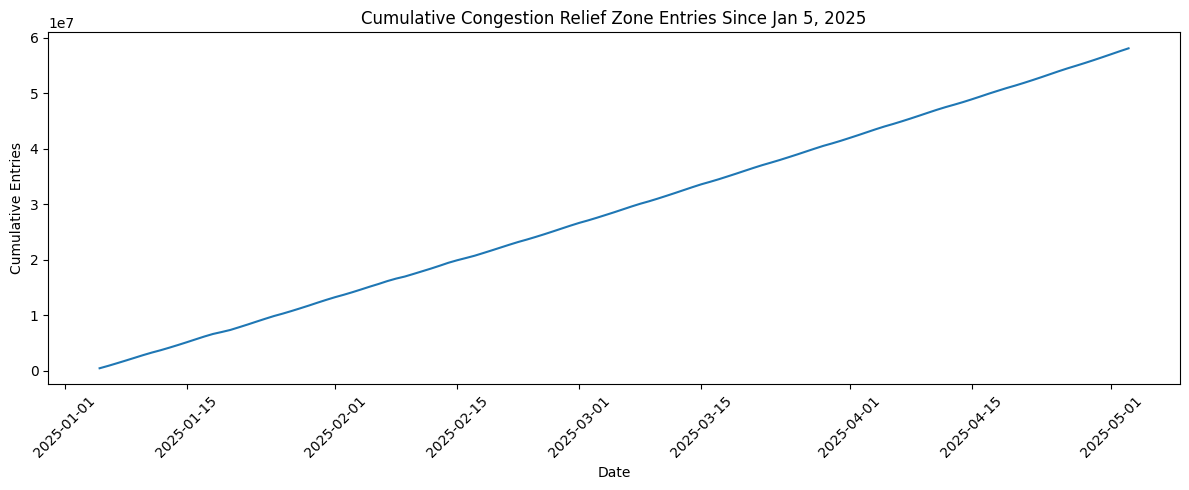

<ipython-input-8-39c18bf5994f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_avg, x='hour_of_day', y='crz_entries', palette='Blues_d')


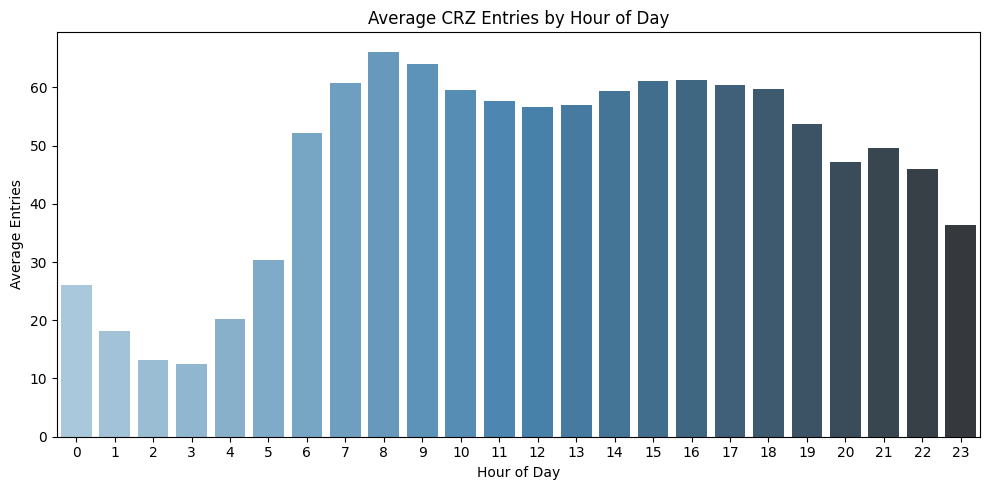

<ipython-input-8-39c18bf5994f>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_class_total, x='crz_entries', y='vehicle_class', palette='viridis')


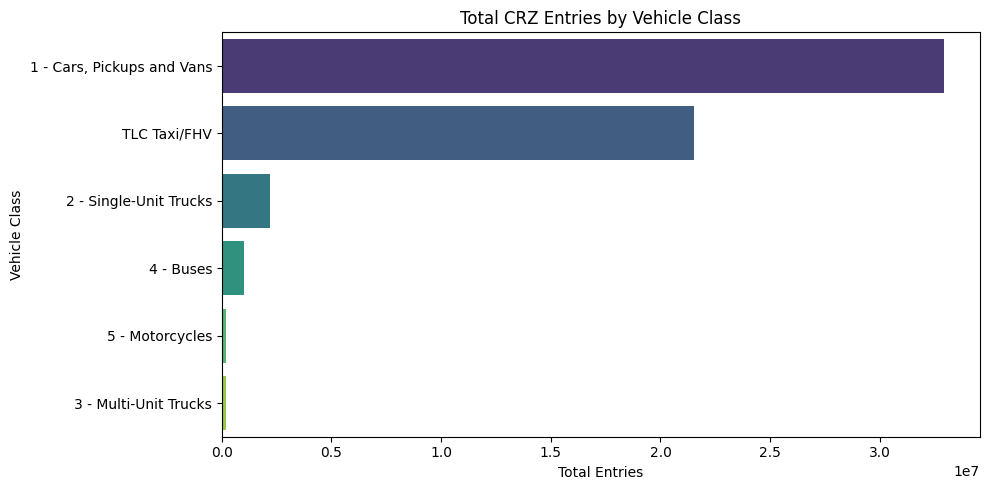

<ipython-input-8-39c18bf5994f>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_total, x='crz_entries', y='detection_region', palette='magma')


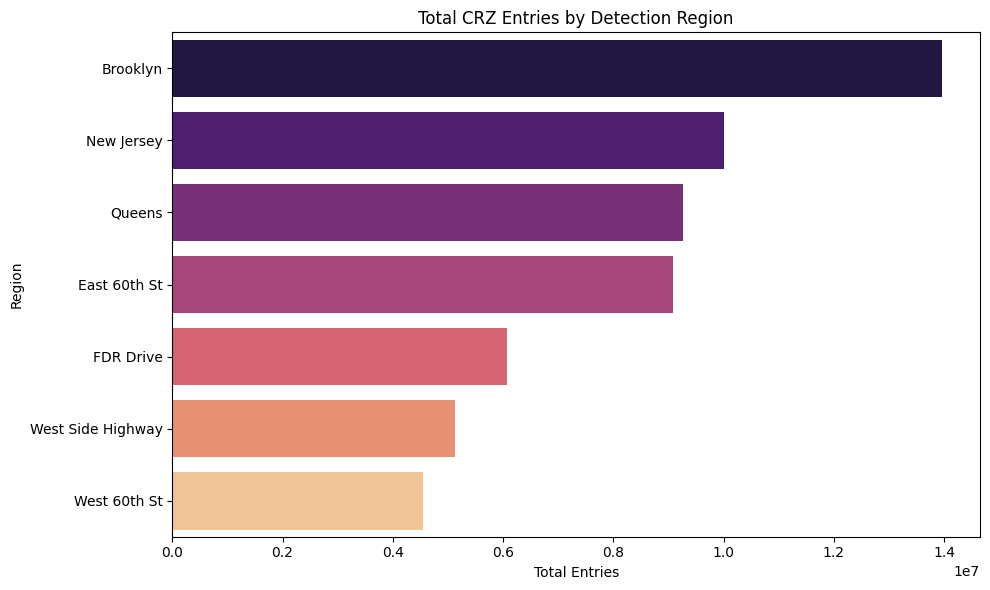

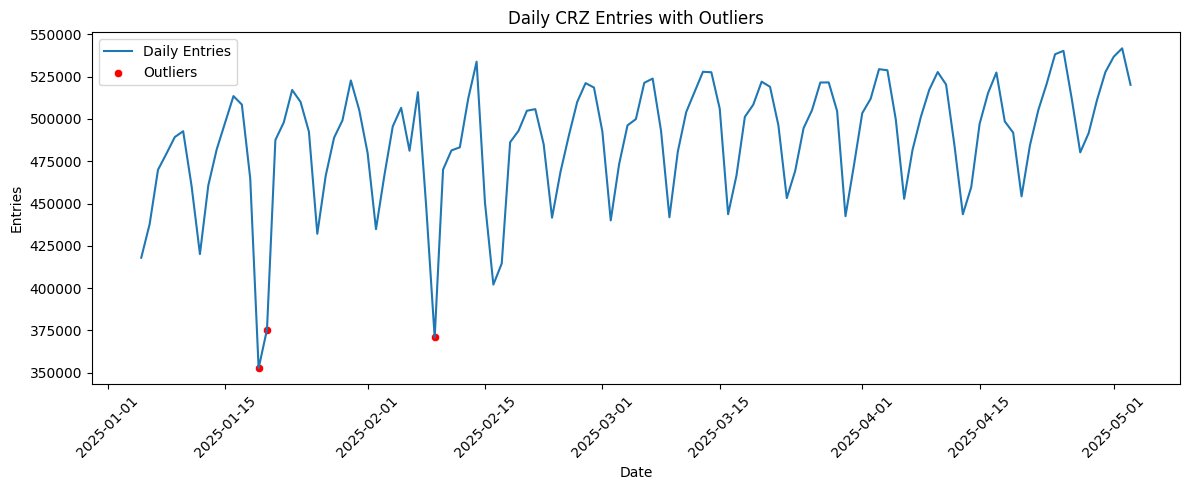

In [8]:
# Print summary stats
print(df.describe(include='all'))

## Daily Congestion Relief Entries Over Time ##
daily_crz = df.groupby('toll_date')['crz_entries'].sum().reset_index()

# Create cumulative total of CRZ entries since program start
daily_crz['cumulative_entries'] = daily_crz['crz_entries'].cumsum()

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_crz, x='toll_date', y='cumulative_entries')
plt.title("Cumulative Congestion Relief Zone Entries Since Jan 5, 2025")
plt.xlabel("Date")
plt.ylabel("Cumulative Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Average Congestion Relief Zone Entries by Hour ##
hourly_avg = df.groupby('hour_of_day')['crz_entries'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_avg, x='hour_of_day', y='crz_entries', palette='Blues_d')
plt.title("Average CRZ Entries by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Entries")
plt.tight_layout()
plt.show()

## Congestion Relief Zone Entries by Vehicle Class ##
vehicle_class_total = df.groupby('vehicle_class')['crz_entries'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=vehicle_class_total, x='crz_entries', y='vehicle_class', palette='viridis')
plt.title("Total CRZ Entries by Vehicle Class")
plt.xlabel("Total Entries")
plt.ylabel("Vehicle Class")
plt.tight_layout()
plt.show()

## Congestion Relief Zone Entries by Detection Region ##
region_total = df.groupby('detection_region')['crz_entries'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_total, x='crz_entries', y='detection_region', palette='magma')
plt.title("Total CRZ Entries by Detection Region")
plt.xlabel("Total Entries")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

## Outlier Detection ##
daily_crz['z_score'] = zscore(daily_crz['crz_entries'])
outliers = daily_crz[daily_crz['z_score'].abs() > 3]

## Highlight outliers ##
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_crz, x='toll_date', y='crz_entries', label='Daily Entries')
sns.scatterplot(data=outliers, x='toll_date', y='crz_entries', color='red', label='Outliers')
plt.title("Daily CRZ Entries with Outliers")
plt.xlabel("Date")
plt.ylabel("Entries")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Assess Weekday vs. Weekend Patterns

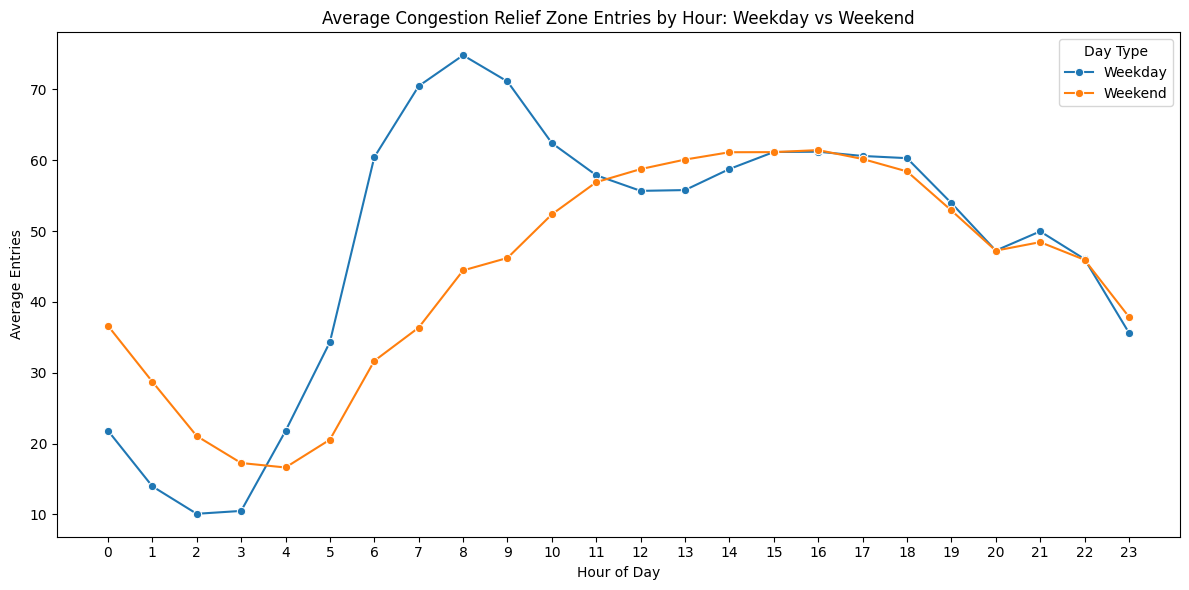

In [5]:
# Load data
df = pd.read_csv("MTA_Congestion_Relief_Zone_Vehicle_Entries__Beginning_2025_20250512.csv")

# Convert date columns
df['Toll Date'] = pd.to_datetime(df['Toll Date'], format='%m/%d/%Y', errors='coerce')
df['Toll 10 Minute Block'] = pd.to_datetime(df['Toll 10 Minute Block'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Drop faulty rows
df.dropna(subset=['Toll Date', 'Toll 10 Minute Block'], inplace=True)

# Add day type (weekday/weekend)
df['day_type'] = df['Day of Week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group and calculate average Congestion Relief Zone entries
hourly_avg = df.groupby(['Hour of Day', 'day_type'])['CRZ Entries'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='Hour of Day', y='CRZ Entries', hue='day_type', marker='o')
plt.title("Average Congestion Relief Zone Entries by Hour: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Average Entries")
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()
